In [2]:
import regex as re
import numpy as np
from statistics import mean, stdev
import matplotlib
import random
import matplotlib.pyplot as plt
from bento_bench import bar_plot, parse_elapsed_secs, get_avg_from_table_str, set_size
import pandas as pd
import json
import seaborn as sns
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    "font.size": 7,
})
fsl = ["ext4-ordered", "ext4-journal", "Bento-fs", "Bento-prov", "Bento-user"]
tl = [1, 18]
ops_workloads = ["createfiles_1t.f", "deletefiles_1t.f", "fileserver.f", "varmail.f", "webserver.f"]
fb_ops_regex = "\d*.\d*(?=\sops\/s)"
fb_mbs_regex = "(?<=rd\/wr\s*)\d*.\d*(?=mb\/s)"
fio_log_regex = "(?<=^\d*, )\d*"
textwidth=470

Bento-user grep avg = 17.580000000000002
Bento-user grep std = 3.834749013951239


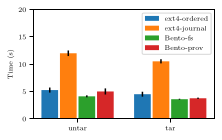

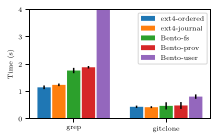

In [65]:
otherapps_1 = ["untar", "tar"]
otherapps_2 = ["grep", "gitclone"]
otherapps_1_avg = {}
otherapps_1_std = {}
otherapps_2_avg = {}
otherapps_2_std = {}
fsl_tar = ["ext4-ordered", "ext4-journal", "Bento-fs", "Bento-prov"]
for fs in fsl:
	otherapps_2_avg[fs] = []
	otherapps_2_std[fs] = []
	for app in otherapps_2:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_2_avg[fs].append(mean(tmp))
		otherapps_2_std[fs].append(stdev(tmp))

	if fs == "Bento-user": continue # Bento-user tar is broken

	otherapps_1_avg[fs] = []
	otherapps_1_std[fs] = []
	for app in otherapps_1:
		tmp = []
		dir = "./results/" + fs + "/" + app
		for f in os.listdir(dir):
			i = int(f.split("_")[1])
			fr = open(dir + "/" + f, 'r')
			t = fr.read()
			fr.close()
			matches = re.findall("\d*:\d*.\d*(?=elapsed)", t)
			tmp.append(parse_elapsed_secs(matches[0]))
		otherapps_1_avg[fs].append(mean(tmp))
		otherapps_1_std[fs].append(stdev(tmp))

fig, ax = plt.subplots(figsize=set_size(textwidth/2))
bar_plot(ax, otherapps_1_avg, fsl_tar, yerr=otherapps_1_std, total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_1)), otherapps_1)
plt.ylim(0, 20)
plt.ylabel("Time (s)")
plt.savefig("./plots/untartar.pgf")

print("Bento-user grep avg = " + str(otherapps_2_avg["Bento-user"][0]))
print("Bento-user grep std = " + str(otherapps_2_std["Bento-user"][0]))
fig, ax = plt.subplots(figsize=set_size(textwidth/2))
bar_plot(ax, otherapps_2_avg, fsl, yerr=otherapps_2_std, total_width=.8, single_width=.9)
plt.xticks(range(len(otherapps_2)), otherapps_2)
plt.ylim(0, 4)
plt.ylabel("Time (s)")
plt.savefig("./plots/grepgitclone.pgf")

{'ext4-ordered': [1.9731891647964215, 1.7608300178595575], 'ext4-journal': [2.507691171117537, 1.5378094568665048], 'Bento-fs': [0.9926589909886193, 1.1546876584006456], 'Bento-prov': [0.2474608663110865, 0.24133819897776937], 'Bento-user': [0.1588775868777594, 2.472330903364149]}


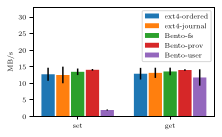

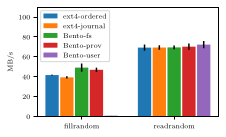

In [66]:
redis = ["set", "get"]
rocksdb = ["fillrandom", "readrandom"]
redis_avg = {}
redis_std = {}
rocksdb_avg = {}
rocksdb_std = {}

for fs in fsl:
	redis_avg[fs] = []
	redis_std[fs] = []
	tmp_set = []
	tmp_get = []
	dir = "./results/" + fs + "/redis"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= requests per second)", t)
		tmp_set.append(float(matches[0]) * 0.0001) # convert
		tmp_get.append(float(matches[1]) * 0.0001) # convert
	redis_avg[fs].append(mean(tmp_set))
	redis_std[fs].append(stdev(tmp_set))
	redis_avg[fs].append(mean(tmp_get))
	redis_std[fs].append(stdev(tmp_get))

	rocksdb_avg[fs] = []
	rocksdb_std[fs] = []
	tmp_fillrandom = []
	tmp_readrandom = []
	dir = "./results/" + fs + "/rocksdb"
	for f in os.listdir(dir):
		i = int(f.split("_")[1])
		fr = open(dir + "/" + f, 'r')
		t = fr.read()
		fr.close()
		matches = re.findall("\d*.\d*(?= MB/s)", t)
		tmp_fillrandom.append(float(matches[0]))
		tmp_readrandom.append(float(matches[1]))
	rocksdb_avg[fs].append(mean(tmp_fillrandom))
	rocksdb_std[fs].append(stdev(tmp_fillrandom))
	rocksdb_avg[fs].append(mean(tmp_readrandom))
	rocksdb_std[fs].append(stdev(tmp_readrandom))

print(redis_std)

fig, ax = plt.subplots(figsize=set_size(textwidth/2))
#bax = brokenaxes(ylims=((0, 10), (25, 50), (150, 170)), hspace=.1)
bar_plot(ax, redis_avg, fsl, yerr=redis_std, total_width=.8, single_width=.9)
plt.xticks(range(len(redis)), redis)
plt.ylabel("MB/s")
plt.ylim(0, 33)
plt.savefig("./plots/redis.pgf")

fig, ax = plt.subplots(figsize=set_size(textwidth/2))
bar_plot(ax, rocksdb_avg, fsl, yerr=rocksdb_std, total_width=.8, single_width=.9)
plt.xticks(range(len(rocksdb)), rocksdb)
plt.ylabel("MB/s")
plt.ylim(0, 110)
plt.savefig("./plots/rocksdb.pgf")

In [14]:
fbresults = pd.DataFrame(columns=["fs", "workload", "T", "i", "r"])
for fs in fsl:
	fbfsresdir = "./results/" + fs + "/filebench/"
	for f in os.listdir(fbfsresdir):
		fresdir = fbfsresdir + f
		for r in os.listdir(fresdir):
			rfile = open(fresdir + "/" + r)
			rtext = rfile.read()
			rfile.close()

			regex = ""
			if f in ops_workloads:
				regex = fb_ops_regex
			else:
				regex = fb_mbs_regex

			matches = re.findall(regex, rtext)

			T = ""
			if "1t" in f:
				(T, i) = r.split("_")
			else:
				i = r

			fbresults = fbresults.append({"fs": fs,
						       "workload": f.replace("_1t", ""),
						       "T": T,
						       "i": i,
						       "r": float(matches[0])},
						      ignore_index=True)

fbavg_cols = ["Workload"]
for fs in fsl:
	fbavg_cols.append(fs)

fbavg = pd.DataFrame(columns=fbavg_cols)
for w in fbresults["workload"].unique():
	d = fbresults[fbresults["workload"] == w]
	w = w.split(".")[0] # remove the file extension
	for T in d["T"].unique():
		d1 = d[d["T"] == T]
		wT = w
		if T != "":
			wT += ", T=" + T

		row = { "Workload": wT }
		for fs in fsl:
			d2 = d1[d1["fs"] == fs]
			r = str(round(d2["r"].mean(), 2))
			if len(d2) > 1:
				r += " (" + str(round(d2["r"].std(), 2)) + ")"
			row[fs] = r
		fbavg = fbavg.append(row, ignore_index=True)

sort_dict = {
	"seq_read_4k, T=1": 0, "seq_read_32k, T=1": 1,"seq_read_128k, T=1": 2,"seq_read_1024k, T=1": 3,
	"seq_read_4k, T=18": 4, "seq_read_32k, T=18": 5,"seq_read_128k, T=18": 6,"seq_read_1024k, T=18": 7,
	"rand_read_4k, T=1": 8, "rand_read_32k, T=1": 9,"rand_read_128k, T=1": 10,"rand_read_1024k, T=1": 11,
	"rand_read_4k, T=18": 12, "rand_read_32k, T=18": 13,"rand_read_128k, T=18": 14 ,"rand_read_1024k, T=18": 15,
	"seq_write_4k, T=1": 16, "seq_write_32k, T=1": 17,  "seq_write_128k, T=1": 18, "seq_write_1024k, T=1": 19,
	"seq_write_4k, T=18": 20, "seq_write_32k, T=18": 21,"seq_write_128k, T=18": 22,"seq_write_1024k, T=18": 23,
	"rand_write_4k, T=1": 24, "rand_write_32k, T=1": 25,"rand_write_128k, T=1": 26,"rand_write_1024k, T=1": 27,
	"rand_write_4k, T=18": 28, "rand_write_32k, T=18": 29,"rand_write_128k, T=18": 30 ,"rand_write_1024k, T=18": 31,
	"createfiles, T=1": 32, "createfiles, T=18": 33, "deletefiles, T=1": 34, "deletefiles, T=18": 35}
fbavg = fbavg.sort_values(by="Workload", key=lambda x: x.map(sort_dict))

fbavg

fbavg[:-3].drop(["Bento-prov"], axis=1).to_latex("./tables/filebench.txt", index=False)

221220.68 (2297.69)


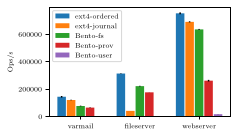

In [68]:
app_workloads = [ "varmail", "fileserver", "webserver" ]
app_workloads_avg = {}
app_workloads_std = {}
print(fbavg[fbavg["Workload"] == "fileserver"].iloc[0]["Bento-fs"])
for fs in fsl:
	app_workloads_avg[fs] = []
	app_workloads_std[fs] = []
	for aw in app_workloads:
		app_workloads_avg[fs].append(float(fbavg[fbavg["Workload"] == aw].iloc[0][fs].split(" (")[0]))
		app_workloads_std[fs].append(float(fbavg[fbavg["Workload"] == aw].iloc[0][fs].split(" (")[1].split(")")[0]))

fig, ax = plt.subplots(figsize=set_size(textwidth/2))
bar_plot(ax, app_workloads_avg, fsl, yerr=app_workloads_std, total_width=.8, single_width=.9)
plt.xticks(range(len(app_workloads)), app_workloads)
plt.ylabel("Ops/s")
plt.savefig("./plots/app_workloads.pgf", bbox_inches = "tight")

In [15]:
fbcmp = pd.DataFrame(columns=["Workload"])

for i, row in fbavg.iterrows():
	fbcmp.loc[i, "Workload"] = row["Workload"]
	fbcmp.loc[i, "Bento-fs:ext4-j"] = round(get_avg_from_table_str(row["Bento-fs"]) / get_avg_from_table_str(row["ext4-journal"]), 2)

fbcmp = fbcmp[:-3]

paper_Bento_cmp = [1.01, 1.01, 1.01, 1.02, 1.00, 0.98, 0.99, 1.00, 1.01, 1.00, 1.00, 1.00, 1.02, 1.01, 1.00, 1.00,
	     1.46, 2.45, 4.12, 3.93, 1.16, 2.27, 6.55, 12.24, 1.15, 4.20, 6.24, 6.50, 1.41, 1.05, 1.09, 0.91]

fbcmp["Paper Bento-fs:ext4-j"] = paper_Bento_cmp


for i, row in fbavg.iterrows():
	fbcmp.loc[i, "Bento-user:ext4-j"] = round(get_avg_from_table_str(row["Bento-user"]) / get_avg_from_table_str(row["ext4-journal"]), 2)
fbcmp = fbcmp[:-3]

paper_user_cmp = [1.01, 1.00, 1.01, 0.99, 0.99, 0.96, 1.00, 1.00, 1.00, 0.99, 0.98, 0.99, 1.02, 1.02, 1.00, 1.00,
		  0.02, 0.01, 0.01, 0.01, 0.07, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.04, 0.02, 0.01, 0.03, 0.01]

fbcmp["Paper Bento-user:ext4-j"] = paper_user_cmp

fbcmp.to_latex("./tables/filebench_cmp.txt", index=False)

In [15]:
clat = {}
fiol = ["randwrite", "write", "read"]
fiofsl = ["Bento-fs", "ext4-journal"]
for fs in fiofsl:
	clat[fs] = {}
	d = "./results/" + fs + "/fio/"
	for fio in fiol:
		fname = d + fio + "_clat.1.log"
		f = open(fname)
		matches = re.findall(fio_log_regex, f.read(), re.MULTILINE)
		clat[fs][fio] = np.array(matches).astype(int) * 0.000001

#xticks = [0, 100, 10000, 100000]
yticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
for fio in fiol:
	fig, ax = plt.subplots(figsize=set_size(textwidth, fraction=0.3))
	ax.set_xscale('log', base=2)
	ax.set_xlabel("Latency (ms)")
	ax.set_ylabel("Proportion")
	ax.set_title(fio)
	#ax.set_xticks(xticks)
	ax.set_yticks(yticks)
	for fs in fiofsl:
		x = np.sort(clat[fs][fio])
		y = np.arange(len(clat[fs][fio])) / len(clat[fs][fio])
		ax.plot(x, y, label=fs)
	ax.legend(loc="lower right")
	plt.savefig("./plots/fio_latency_" + fio + ".pgf", bbox_inches = "tight")
plt.close()

In [9]:
fbramresults = pd.DataFrame(columns=["fs", "workload", "T", "i", "r"])
fbramfsl = [ "Bento-fs", "ext4-journal" ]
for fs in fbramfsl:
	fbfsresdir = "./results/ram/" + fs + "/filebench/"
	for f in os.listdir(fbfsresdir):
		fresdir = fbfsresdir + f
		for r in os.listdir(fresdir):
			rfile = open(fresdir + "/" + r)
			rtext = rfile.read()
			rfile.close()

			regex = ""
			if f in ops_workloads:
				regex = fb_ops_regex
			else:
				regex = fb_mbs_regex

			matches = re.findall(regex, rtext)

			T = ""
			if "1t" in f:
				(T, i) = r.split("_")
			else:
				i = r

			fbramresults = fbramresults.append({"fs": fs,
						       "workload": f.replace("_1t", ""),
						       "T": T,
						       "i": i,
						       "r": float(matches[0])},
						      ignore_index=True)

fbramavg_cols = ["Workload"]
for fs in fbramfsl:
	fbramavg_cols.append(fs)

fbramavg = pd.DataFrame(columns=fbramavg_cols)
for w in fbramresults["workload"].unique():
	d = fbramresults[fbramresults["workload"] == w]
	w = w.split(".")[0] # remove the file extension
	for T in d["T"].unique():
		d1 = d[d["T"] == T]
		wT = w
		if T != "":
			wT += ", T=" + T

		row = { "Workload": wT }
		for fs in fbramfsl:
			d2 = d1[d1["fs"] == fs]
			r = str(round(d2["r"].mean(), 2))
			if len(d2) > 1:
				r += " (" + str(round(d2["r"].std(), 2)) + ")"
			row[fs] = r
		fbramavg = fbramavg.append(row, ignore_index=True)

sort_dict = {
	"seq_read_128k, T=1": 0, "seq_read_128k, T=18": 1,
	"rand_read_128k, T=1": 2, "rand_read_128k, T=18": 3,
	"seq_write_128k, T=1": 4,
	"rand_write_128k, T=1": 6, "rand_write_128k, T=18": 7
}
fbramavg = fbramavg.sort_values(by="Workload", key=lambda x: x.map(sort_dict))

print(fbramavg)

fbramavg.to_latex("./tables/filebench_ram.txt", index=False)

                Workload           Bento-fs      ext4-journal
2     seq_read_128k, T=1   4666.05 (111.07)  5444.82 (572.69)
3    seq_read_128k, T=18  10071.34 (500.55)  11934.53 (916.3)
0    rand_read_128k, T=1   3890.34 (647.44)  3890.32 (647.43)
1   rand_read_128k, T=18     4097.06 (0.14)     4097.2 (0.13)
4    seq_write_128k, T=1             1333.1    495.94 (35.12)
5   seq_write_128k, T=18             1683.7    487.42 (20.11)
7   rand_write_128k, T=1   2334.53 (280.42)       585.1 (5.9)
6  rand_write_128k, T=18   2217.68 (138.46)    546.76 (11.24)


In [19]:
fbramcmp = pd.DataFrame(columns=["Workload"])

for i, row in fbramavg.iterrows():
	fbramcmp.loc[i, "Workload"] = row["Workload"]
	fbramcmp.loc[i, "RAM Bento-fs:ext4-j"] = round(get_avg_from_table_str(row["Bento-fs"]) / get_avg_from_table_str(row["ext4-journal"]), 2)

for i, row in fbramcmp.iterrows():
	d = fbcmp[fbcmp["Workload"] == row["Workload"]]
	print(d["Bento-fs:ext4-j"])
	#fbramcmp.loc[i, "900P Bento-fs:ext4-j"] = d["Bento-fs:ext4-j"]

fbramcmp.to_latex("./tables/filebench_ram_cmp.txt", index=False)

5    1.11
Name: Bento-fs:ext4-j, dtype: float64
4    0.84
Name: Bento-fs:ext4-j, dtype: float64
6    0.65
Name: Bento-fs:ext4-j, dtype: float64
7    1.0
Name: Bento-fs:ext4-j, dtype: float64
13    2.67
Name: Bento-fs:ext4-j, dtype: float64
Series([], Name: Bento-fs:ext4-j, dtype: float64)
27    4.07
Name: Bento-fs:ext4-j, dtype: float64
28    3.57
Name: Bento-fs:ext4-j, dtype: float64
